In [37]:
# read csv file
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
# Load the cleaned sales dataset
data = pd.read_csv("sales_analysis.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Type                      180519 non-null  object 
 1   Sales per customer        180519 non-null  float64
 2   Delivery Status           180519 non-null  object 
 3   Late_delivery_risk        180519 non-null  int64  
 4   Category Name             180519 non-null  object 
 5   Department Name           180519 non-null  object 
 6   Market                    180519 non-null  object 
 7   order date (DateOrders)   180519 non-null  object 
 8   Order Item Discount Rate  180519 non-null  float64
 9   Order Item Id             180519 non-null  int64  
 10  Sales                     180519 non-null  float64
 11  Order Item Total          180519 non-null  float64
 12  Order Region              180519 non-null  object 
 13  Order Status              180519 non-null  o

In [38]:
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data[['Type','Delivery Status','Category Name','Order Region','Department Name','Market','Shipping Mode','Order Status']] = data[['Type','Delivery Status','Category Name','Order Region','Department Name','Market','Shipping Mode','Order Status']].astype('category')

In [39]:
df = data.copy()

In [40]:
#retrieve the dataset with discounted sales to check out the promo effect 
df = df.drop(data.columns[[0,1,2,3,4,6,9,11,12,13,14,15,16,17,18,19,20]],axis = 1)

In [41]:
df.set_index('order date (DateOrders)', inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180519 entries, 2018-01-31 22:56:00 to 2016-01-15 18:54:00
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Department Name           180519 non-null  category
 1   Order Item Discount Rate  180519 non-null  float64 
 2   Sales                     180519 non-null  float64 
dtypes: category(1), float64(2)
memory usage: 4.3 MB


In [43]:
df["is_discount"] = (df["Order Item Discount Rate"] > 0).astype(int)

In [44]:
df.head()

,Department Name,Order Item Discount Rate,Sales,is_discount
order date (DateOrders),,,,
2018-01-31 22:56:00,Fitness,0.04,327.75,1
2018-01-13 12:27:00,Fitness,0.05,327.75,1
2018-01-13 12:06:00,Fitness,0.06,327.75,1
2018-01-13 11:45:00,Fitness,0.07,327.75,1
2018-01-13 11:24:00,Fitness,0.09,327.75,1


<AxesSubplot:title={'center':'Salses by discount'}, xlabel='is_discount'>

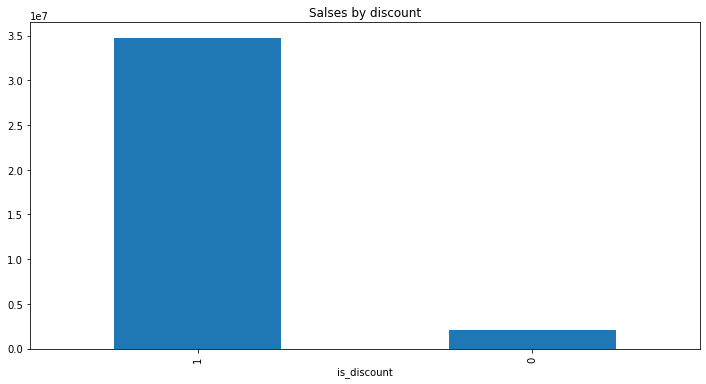

In [45]:
discount = df.groupby('is_discount') #Grouping by is_discount
plt.figure(1)
discount['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Salses by discount")

### from above, we can tell that most of the sales are with discount in different percentage, here it won't be that effective to forecast sales based on the promo effect
### Now let's dive into holiday insights to see if there is any holiday impact

In [46]:
df1 = data.copy()

In [47]:
import holidays
  
# Combining Countries as EU, LATAM are the top markets in the sales data
global_holiday = holidays.ECB(years = [2015,2016,2017]) + holidays.US(years = [2015,2016,2017]) + holidays.MX(years = [2015,2016,2017])
len(global_holiday)

66

In [48]:
#retrieve the dataset with date info to check out is_holiday effect on sales
df1 = df1.drop(data.columns[[0,1,2,3,4,6,8,9,11,12,13,14,15,16,17,18,19,20]],axis = 1)

In [49]:
df1['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
df1[['Department Name']] = df1[['Department Name']].astype('category')

In [50]:
#Split file by department name, and taking Fanshop for analysis as it's top sales department
##Fanshop = df1.loc[data['Department Name'] == 'Fan Shop']
#Fanshop = Fanshop[["order date (DateOrders)","Order Item Total"]]
##Fanshop = df1.groupby('order date (DateOrders)')['Sales'].sum().reset_index()
##Fanshop.info()

In [51]:
df1['Date'] = pd.DatetimeIndex(df1['order date (DateOrders)']).date

In [52]:
df1.set_index('order date (DateOrders)', inplace=True)

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180519 entries, 2018-01-31 22:56:00 to 2016-01-15 18:54:00
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   Department Name  180519 non-null  category
 1   Sales            180519 non-null  float64 
 2   Date             180519 non-null  object  
dtypes: category(1), float64(1), object(1)
memory usage: 4.3+ MB


In [54]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [55]:
df1['Holiday'] = df1['Date'].isin(global_holiday)
df1.head(n=10)

,Department Name,Sales,Date,Holiday
order date (DateOrders),,,,
2018-01-31 22:56:00,Fitness,327.75,2018-01-31,False
2018-01-13 12:27:00,Fitness,327.75,2018-01-13,False
2018-01-13 12:06:00,Fitness,327.75,2018-01-13,False
2018-01-13 11:45:00,Fitness,327.75,2018-01-13,False
2018-01-13 11:24:00,Fitness,327.75,2018-01-13,False
2018-01-13 11:03:00,Fitness,327.75,2018-01-13,False
2018-01-13 10:42:00,Fitness,327.75,2018-01-13,False
2018-01-13 10:21:00,Fitness,327.75,2018-01-13,False
2018-01-13 10:00:00,Fitness,327.75,2018-01-13,False


<AxesSubplot:title={'center':'Salses by holiday'}, xlabel='Holiday'>

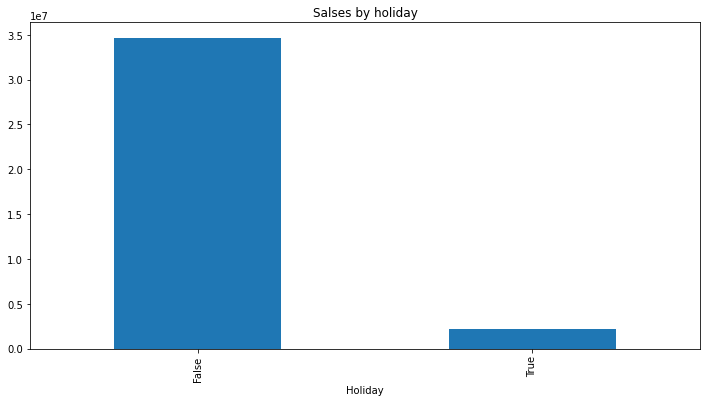

In [56]:
holiday = df1.groupby('Holiday') #Grouping by holiday
plt.figure(1)
holiday['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Salses by holiday")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


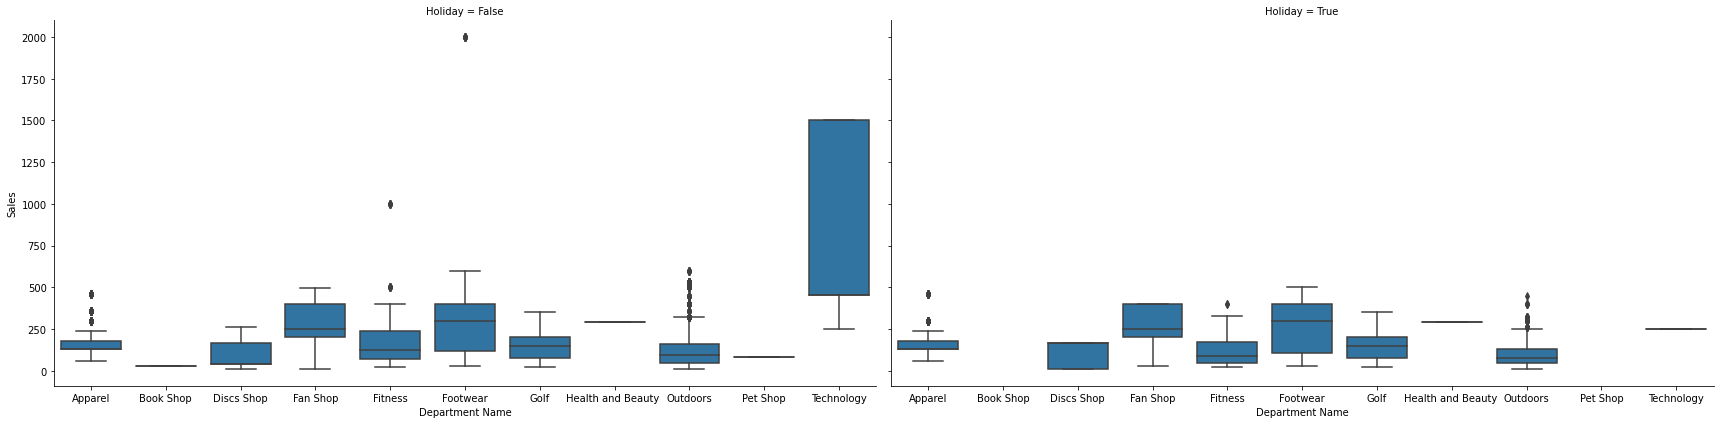

In [57]:
g = sns.FacetGrid(df1, col="Holiday", height=6, aspect=2)
g.map(sns.boxplot, "Department Name", "Sales")

In [58]:
# Based on the above holiday sales summary observed from EU/America holidays, the holiday sales

In [59]:
df2 = df1.copy()

In [60]:
df2['Date'] = pd.to_datetime(df1['Date'])

In [61]:
df2['Date'] = df2['Date'] + dt.timedelta(days=4) #as the sales model, the sales might happen earlier before the holiday season, let's see if shifted dates will be observed and aligned with holidays. shift calculated based on average shipping days

In [62]:
df2.head()

,Department Name,Sales,Date,Holiday
order date (DateOrders),,,,
2018-01-31 22:56:00,Fitness,327.75,2018-02-04,False
2018-01-13 12:27:00,Fitness,327.75,2018-01-17,False
2018-01-13 12:06:00,Fitness,327.75,2018-01-17,False
2018-01-13 11:45:00,Fitness,327.75,2018-01-17,False
2018-01-13 11:24:00,Fitness,327.75,2018-01-17,False


In [63]:
df2['is_Holiday'] = df2['Date'].isin(global_holiday)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


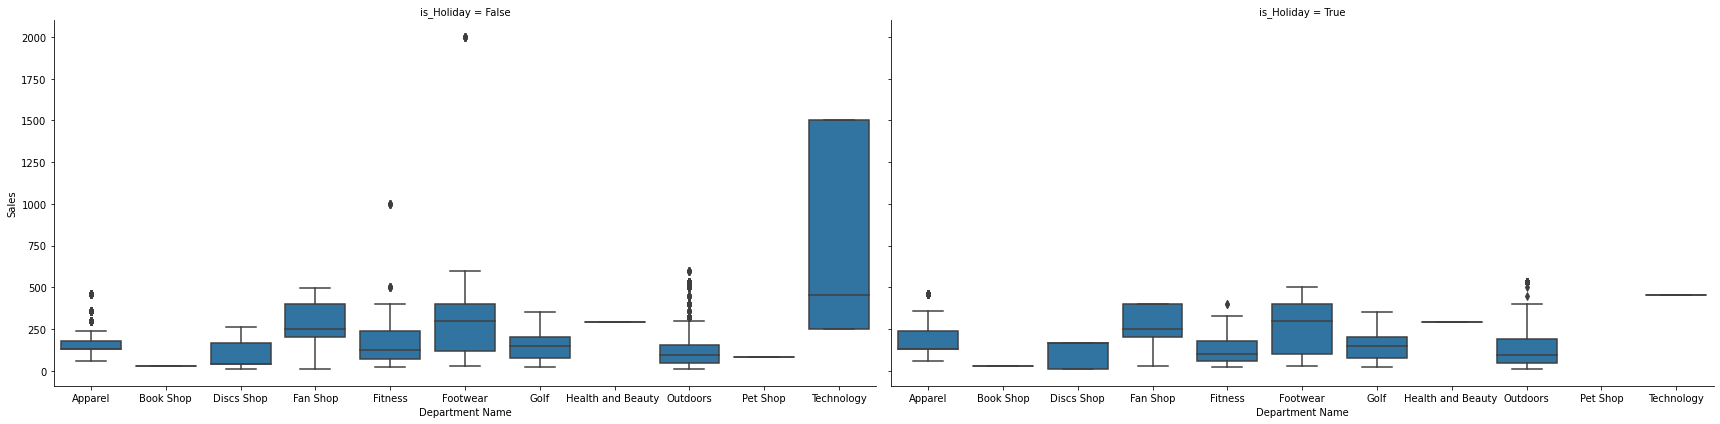

In [64]:
g = sns.FacetGrid(df2, col="is_Holiday", height=6, aspect=2)
g.map(sns.boxplot, "Department Name", "Sales")

<AxesSubplot:title={'center':'Salses by holiday'}, xlabel='is_Holiday'>

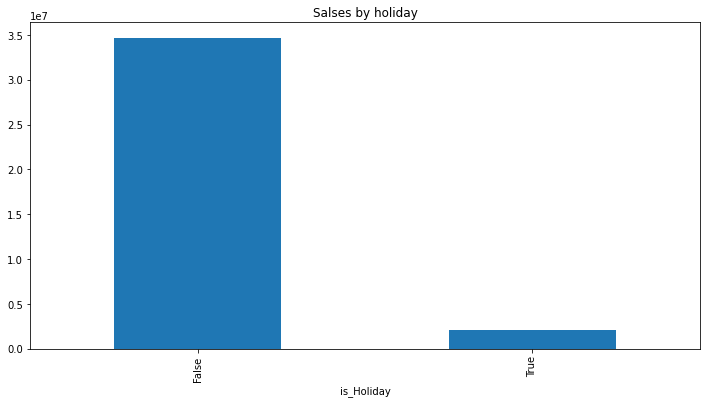

In [65]:
holiday1 = df2.groupby('is_Holiday') #Grouping by holiday
plt.figure(1)
holiday1['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Salses by holiday")

### Overall, holiday impact on sales is minimum and we will apply the machine learning model on the time series sales data now

# Apply time series machine learning modelling by utilizing low coding packaging Pycaret. 
### From the package, it will apply to multiple algorithm and choose the best fit model for forecasting

In [66]:
data['Department Name'] = data['Department Name'].astype('category')
data['Department Name'].value_counts()

Fan Shop              66861
Apparel               48998
Golf                  33220
Footwear              14525
Outdoors               9686
Fitness                2479
Discs Shop             2026
Technology             1465
Pet Shop                492
Book Shop               405
Health and Beauty       362
Name: Department Name, dtype: int64

In [67]:
#retrieve the dataset with time series date for machine learning model application
dt = data.drop(data.columns[[0,1,2,3,4,6,8,9,11,12,13,14,15,16,17,18,19,20]],axis = 1)

In [68]:
#Split file by department name, and taking Fanshop for analysis as it's top sales department
Fanshop = dt.loc[dt['Department Name'] == 'Fan Shop']
#Fanshop = Fanshop[["order date (DateOrders)","Order Item Total"]]
Fanshop = Fanshop.groupby('order date (DateOrders)')['Sales'].sum().reset_index()
Fanshop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41303 entries, 0 to 41302
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order date (DateOrders)  41303 non-null  datetime64[ns]
 1   Sales                    41303 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 645.5 KB


In [69]:
Fanshop["order date"]= pd.to_datetime(Fanshop["order date (DateOrders)"])
Fanshop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41303 entries, 0 to 41302
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order date (DateOrders)  41303 non-null  datetime64[ns]
 1   Sales                    41303 non-null  float64       
 2   order date               41303 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 968.2 KB


In [70]:
Fanshop.set_index('order date', inplace=True)

In [71]:
Fanshop = Fanshop.resample('SMS').mean() #resample time series data in semi month start as we only have around 3 years sales data

In [72]:
Fanshop = Fanshop['2015-01-01':'2017-09-01'] #Define date range 

In [73]:
# create 3 month moving average
Fanshop['MA3'] = Fanshop['Sales'].rolling(3).mean()
# plot the data and MA
import plotly.express as px
fig = px.line(Fanshop, x=Fanshop.index, y=["Sales","MA3"])
fig.show()

In [74]:
# extract month and year from dates
Fanshop['Month'] = [i.month for i in Fanshop.index]
Fanshop['Year'] = [i.year for i in Fanshop.index]
# create a sequence of numbers
Fanshop['Series'] = np.arange(1,len(Fanshop)+1)
# drop unnecessary columns and re-arrange
Fanshop.drop(['MA3'], axis=1, inplace=True)
df3 = Fanshop[['Series', 'Year', 'Month','Sales']] 
# check the head of the dataset
df3.head()

,Series,Year,Month,Sales
order date,,,,
2015-01-01,1,2015,1,422.220184
2015-01-15,2,2015,1,416.612484
2015-02-01,3,2015,2,394.362762
2015-02-15,4,2015,2,433.953146
2015-03-01,5,2015,3,422.319834


In [75]:
# split data into train-test set, this is aligned with time series statistical model before & after 2017. As time series data is 3 years, from previous visualization and following around 65/35 percentage, here I manually split the train and test data
train = df3[df3['Year'] < 2017]
test = df3[df3['Year'] >= 2017]
# check shape
train.shape, test.shape

((48, 4), (17, 4))

In [76]:
# import the regression module
from pycaret.regression import *
# initialize setup and here as we manually split the train and test data in advance
s = setup(data = train, test_data = test, target = 'Sales', fold_strategy = 'timeseries', numeric_features = ['Year','Series'], fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Sales
2,Original Data,"(48, 4)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(48, 14)"


In [77]:
best = compare_models(sort = 'MAE') #choose the best model by measuring the MAE score

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,7.1833,77.9431,8.7000,0.0569,0.0208,0.0172,0.0100
ada,AdaBoost Regressor,7.4558,87.5264,9.2037,-0.0523,0.0219,0.0179,0.0500
lightgbm,Light Gradient Boosting Machine,7.6079,87.4639,9.1087,-0.0017,0.0217,0.0182,0.0233
llar,Lasso Least Angle Regression,7.6079,87.4639,9.1087,-0.0017,0.0217,0.0182,0.0133
br,Bayesian Ridge,7.6420,87.5805,9.1164,-0.0038,0.0217,0.0183,0.0133
lasso,Lasso Regression,7.6576,87.7685,9.1313,-0.0085,0.0218,0.0183,0.6067
huber,Huber Regressor,7.7657,96.8698,9.4259,-0.0451,0.0225,0.0186,0.0167
knn,K Neighbors Regressor,7.7947,96.0141,9.6530,-0.1692,0.0230,0.0186,0.5333
en,Elastic Net,7.8390,90.3917,9.3072,-0.0612,0.0222,0.0188,0.0100
rf,Random Forest Regressor,7.8514,89.6073,9.1942,-0.0152,0.0220,0.0188,0.0900


In [78]:
#From above, the best model OMP also tops with MSE & RMSE score
prediction_holdout = predict_model(best) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,7.9600,97.5052,9.8745,-0.4463,0.0233,0.0187


In [79]:
# generate predictions on the original dataset
predictions = predict_model(best, data=Fanshop)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2015-01-01', end = '2017-09-01', freq = 'SMS')
# line plot
fig = px.line(predictions, x=Fanshop.index, y=["Sales", "Label"])
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2017-01-01", x1="2017-09-01", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

In [80]:
final_best = finalize_model(best)

In [81]:
future_dates = pd.date_range(start = '2017-09-15', end = '2022-09-15', freq = 'SMS') #Forecasting the future 5 years sales 
future_df = pd.DataFrame()
#future_df['Week'] = [i.week for i in future_dates]
future_df['Month'] = [i.month for i in future_dates]
future_df['Year'] = [i.year for i in future_dates]

future_df['Series'] = np.arange(145,(145+len(future_dates)))
future_df.head()

,Month,Year,Series
0,9,2017,145
1,10,2017,146
2,10,2017,147
3,11,2017,148
4,11,2017,149


In [82]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

,Month,Year,Series,Label
0,9,2017,145,416.921339
1,10,2017,146,416.921339
2,10,2017,147,416.921339
3,11,2017,148,432.394161
4,11,2017,149,432.394161


In [83]:
concat_df = pd.concat([Fanshop,predictions_future], axis=0)
concat_df_i = pd.date_range(start='2015-01-01', end = '2022-09-15', freq = 'SMS')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y=["Sales", "Label"])
fig.show()

### So far, we have forecasted by time series (order date), above splot showing a pretty stable sales trend with a peak around Nov each year.
### Here is the initial code and output. Comparing the stat model and machine learning algorithm, the data source play a critical role here as we only have limited time period less than 3 years. Meanwhile, there will be other factors could be built in for the forecast. Next step, I will plan to apply the machine learning model by corporating holiday impacts and check again if there is any difference. 
